In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.io
import math
import os

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=1)

In [3]:
simulation_names = ['linear', 'exponential', 'cubic', 'joint_normal', 'step',
                    'quadratic', 'w_shape', 'spiral', 'bernoulli', 'log',
                    'fourth_root', 'sine_4pi', 'sine_16pi', 'square', 'two_parabolas',
                    'circle', 'ellipse', 'diamond', 'multi_noise', 'multi_indept']

In [4]:
def get_data(simulation_type):
    file_name_prefix = './sample_data_viz/type_{}'.format(simulation_type)

    ori_X = scipy.io.loadmat(file_name_prefix + '_X.mat')['x_mtx']
    ori_Y = scipy.io.loadmat(file_name_prefix + '_Y.mat')['y_mtx']
    
    min_X = np.amin(ori_X)
    min_Y = np.amin(ori_Y)
    max_X = np.amax(ori_X-min_X)
    max_Y = np.amax(ori_Y-min_Y)
    
    matrix_X = (ori_X-min_X)*2/max_X - 1
    matrix_Y = (ori_Y-min_Y)*2/max_Y - 1
    
    return matrix_X, matrix_Y

In [5]:
def rotate_by_theta(x, y, theta):
    # rotation transform matrix
    c, s = np.cos(math.radians(theta)), np.sin(math.radians(theta))
    rotation_matrix = np.array([[c, s], [-s, c]])

    # apply two sample transform
    data_matrix = np.concatenate([x, y], axis=1)
    rotated_data_matrix = np.dot(rotation_matrix, data_matrix.T).T
    x_rotated, y_rotated = np.hsplit(rotated_data_matrix, 2)
    
    return x_rotated, y_rotated

In [6]:
def plot_all_simulations():
    sns.despine()
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(28,23), sharex=True, sharey=True)
    for simulation_type in range(1, 20):
        row = (simulation_type-1) // 5
        col = (simulation_type-1) % 5

        x, y = get_data(simulation_type)
        x_rotated, y_rotated = rotate_by_theta(x, y, 60)

        ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], ax=axs[row][col])
        ax_sub.set_xticks([x.min(), 0, x.max()])
        ax_sub.set_title(simulation_names[simulation_type-1], fontweight='bold', fontsize='x-large')
        ax_sub.tick_params(axis='both', labelsize=20)

    # plot last sim outside, to get only one legend
    x, y = get_data(20)
    x_rotated, y_rotated = rotate_by_theta(x, y, 60)
    ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], label='Normal', ax=axs[3][4])
    ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], label='Rotated', ax=axs[3][4])
    ax_sub.set_xticks([x.min(), 0, x.max()])
    ax_sub.set_title(simulation_names[19], fontweight='bold', fontsize='x-large')
    ax_sub.tick_params(axis='both', labelsize=20)

    leg = plt.legend(bbox_to_anchor=(0.5, 0.105), bbox_transform=plt.gcf().transFigure, ncol=5, loc='upper center', fontsize='x-large', markerscale=2)
    leg.get_frame().set_linewidth(0.0)
    plt.subplots_adjust(hspace=.25)

    plt.savefig('two_sample_simulations_plot_rot_60.eps', format='eps', bbox_inches='tight')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './sample_data_viz/type_1_X.mat'

<Figure size 432x288 with 0 Axes>

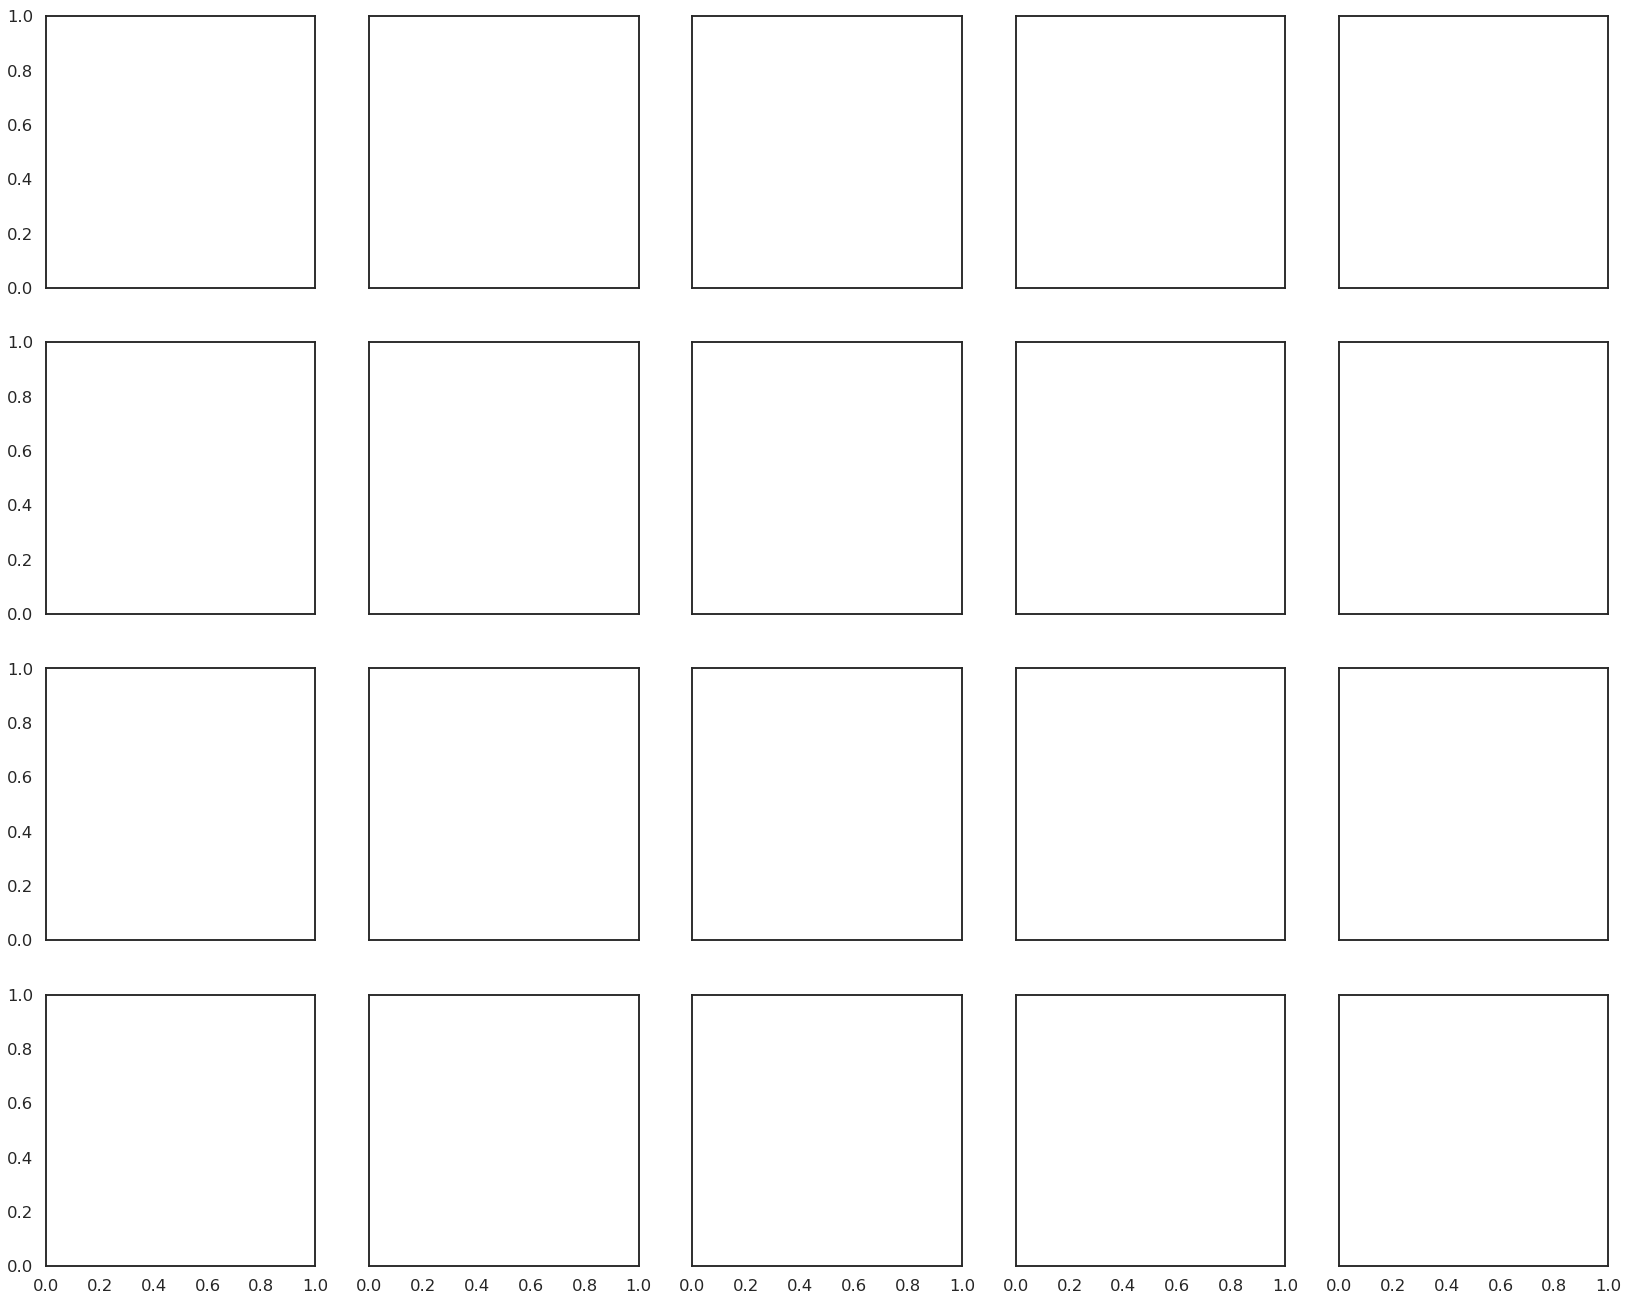

In [7]:
plot_all_simulations()